C:\Users\btigr\AppData\Local\Temp\ipykernel_26756\144663029.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0,0], data=sales_by_category,
C:\Users\btigr\AppData\Local\Temp\ipykernel_26756\144663029.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0,1], data=sales_by_channel,
C:\Users\btigr\AppData\Local\Temp\ipykernel_26756\144663029.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1,0], data=sales_by_brand,
C:\Users\btigr\AppData\Local\Temp\ipykernel_26756\144663029.py:84: FutureWarning: 

Passing `palet

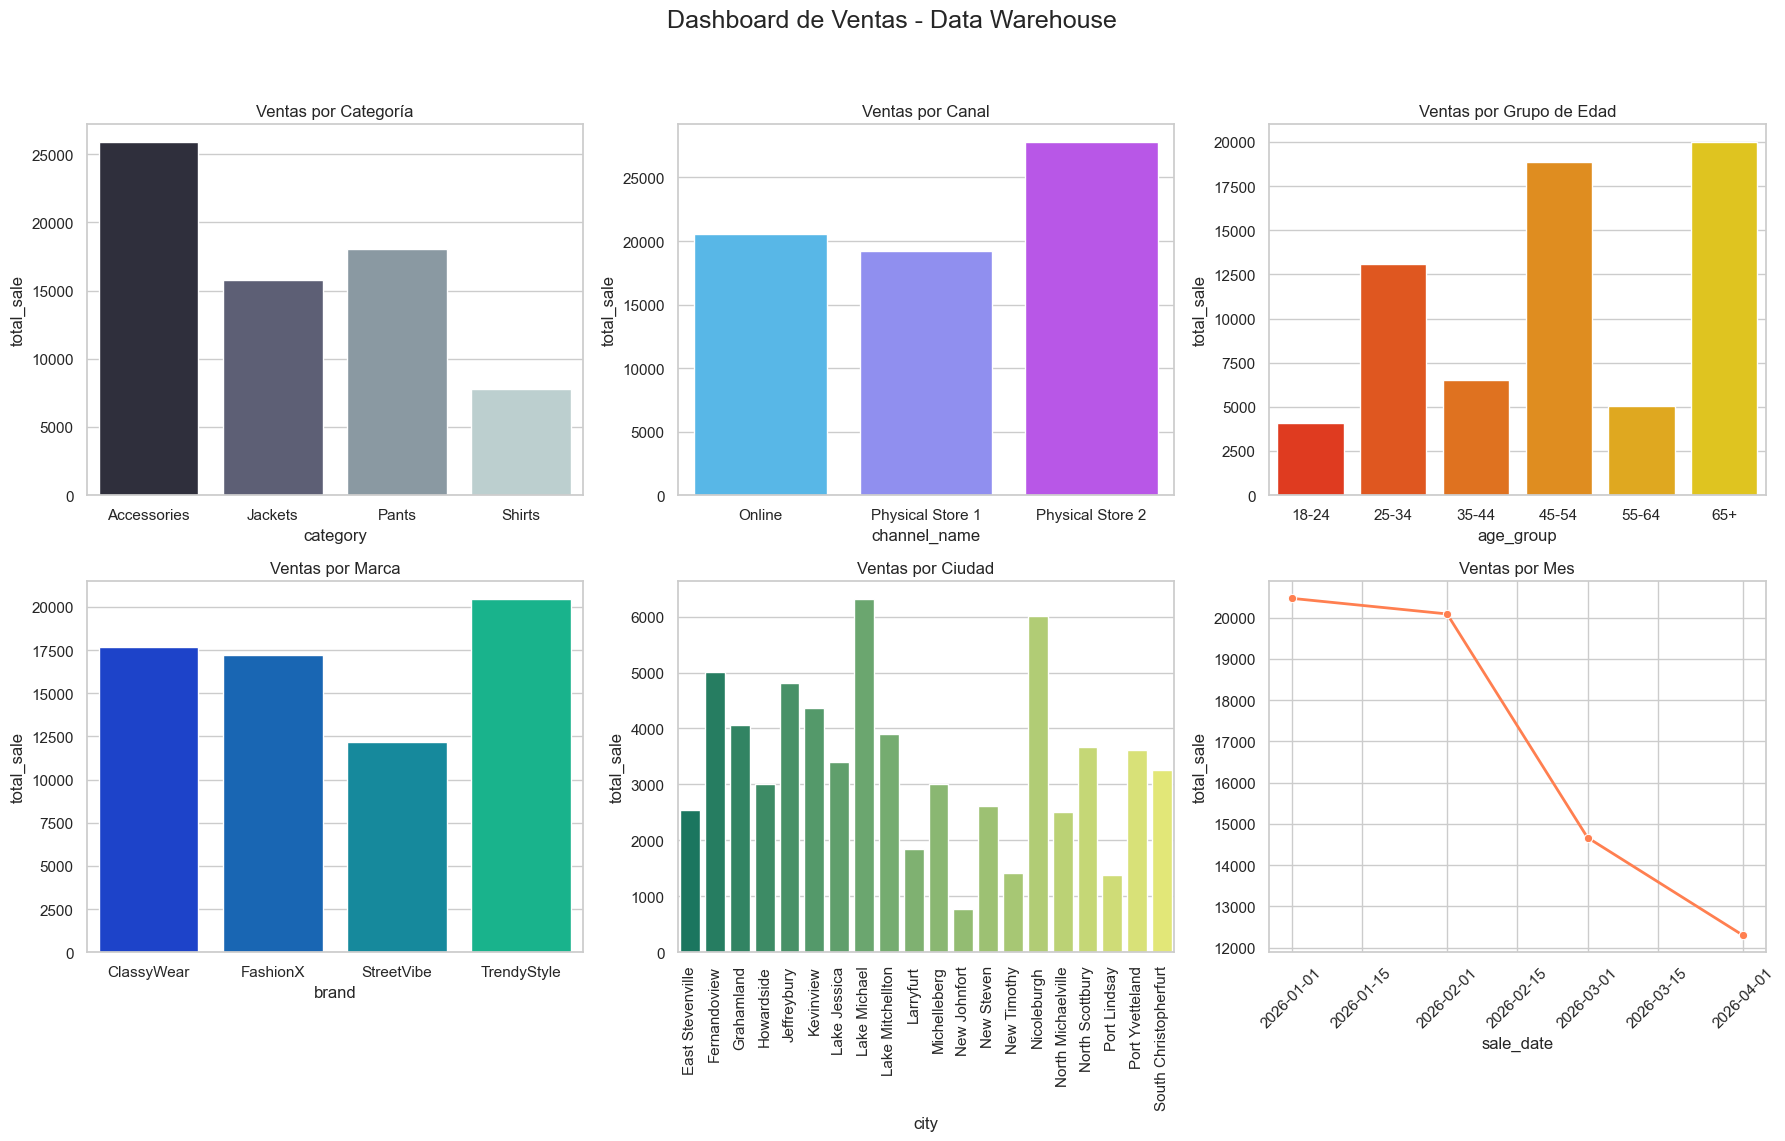

In [56]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Path
route = r'C:\Users\btigr\Documents\UAO\5\ETL\ETL_2026_1\lab_03\ddm_lab\lab_03\data\warehouse'

# Load dimensions and fact table from CSV files
dim_channel = pd.read_csv(os.path.join(route, 'dim_channel.csv'))
dim_customer = pd.read_csv(os.path.join(route, 'dim_customer.csv'))
dim_product = pd.read_csv(os.path.join(route, 'dim_product.csv'))
dim_time = pd.read_csv(os.path.join(route, 'dim_time.csv'))
fact_sales = pd.read_csv(os.path.join(route, 'fact_sales.csv'))


# Calculate total sales for each record in fact_sales
fact_sales["total_sale"] = fact_sales["quantity"] * fact_sales["unit_price_sale"]


# Create a dashboard with 6 visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Dashboard de Ventas - Data Warehouse", fontsize=18)
fig.tight_layout()


# Merge fact_sales with dimension tables to get descriptive attributes for visualizations
df_category = fact_sales.merge(dim_product[["product_id", "category"]],
                               on="product_id", how="left")

sales_by_category = df_category.groupby("category")["total_sale"].sum().reset_index()

sns.barplot(ax=axes[0,0], data=sales_by_category,
            x="category", y="total_sale", palette="bone")

axes[0,0].set_title("Ventas por Categoría")
axes[0,0].tick_params(axis='x', rotation=0)


# Merge fact_sales with dim_channel to get channel names for visualization
df_channel = fact_sales.merge(dim_channel[["channel_id", "channel_name"]],
                              on="channel_id", how="left")

sales_by_channel = df_channel.groupby("channel_name")["total_sale"].sum().reset_index()

sns.barplot(ax=axes[0,1], data=sales_by_channel,
            x="channel_name", y="total_sale", palette="cool")

axes[0,1].set_title("Ventas por Canal")
axes[0,1].tick_params(axis='x', rotation=0)


# Convert sale_date to datetime and extract month-year for time series visualization
fact_sales["sale_date"] = pd.to_datetime(fact_sales["sale_date"] + "-01")

sales_by_month = fact_sales.groupby("sale_date")["total_sale"].sum().reset_index()

sns.lineplot(ax=axes[1,2], data=sales_by_month,
             x="sale_date", y="total_sale", marker="o", linewidth=2, color="coral")

axes[1,2].set_title("Ventas por Mes")
axes[1,2].tick_params(axis='x', rotation=45)


# Merge fact_sales with dim_product to get brand names for visualization
df_brand = fact_sales.merge(dim_product[["product_id", "brand"]],
                            on="product_id", how="left")

sales_by_brand = df_brand.groupby("brand")["total_sale"].sum().reset_index()

sns.barplot(ax=axes[1,0], data=sales_by_brand,
            x="brand", y="total_sale", palette="winter")

axes[1,0].set_title("Ventas por Marca")
axes[1,0].tick_params(axis='x', rotation=0)


# Merge fact_sales with dim_customer to get city names for visualization
df_city = fact_sales.merge(dim_customer[["customer_id", "city"]],
                           on="customer_id", how="left")

sales_by_city = df_city.groupby("city")["total_sale"].sum().reset_index()

sns.barplot(ax=axes[1,1], data=sales_by_city,
            x="city", y="total_sale", palette="summer")

axes[1,1].set_title("Ventas por Ciudad")
axes[1,1].tick_params(axis='x', rotation=90)


# Merge fact_sales with dim_customer to get age for visualization
df_age = fact_sales.merge(dim_customer, on="customer_id", how="left")

bins = [18, 25, 35, 45, 55, 65, 120]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

df_age["age_group"] = pd.cut(df_age["age"], bins=bins, labels=labels, right=False)

sales_by_age = df_age.groupby("age_group")["total_sale"].sum().reset_index()

sns.barplot(ax=axes[0,2], data=sales_by_age,
            x="age_group", y="total_sale", palette="autumn")

axes[0,2].set_title("Ventas por Grupo de Edad")

# Adjust layout and show the dashboard
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()